### Árvore Filogenética 

In [1]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

Ler arquivo contendo Alinhamento Múltiplo

In [2]:
aln_GH95 = AlignIO.read("gh95.aln-sth", "stockholm")

print(f"Alignment: \n {aln_GH95} \n ####################")

Alignment: 
 Alignment with 18 rows and 3628 columns
MKKIPIGKLASRAVAAVIAAG--MALTLMPFAASSATAAQTDAS...RHV Bifidobacterium_saguinibicoloris
MKKIPIGRIAARALAALISAG--MAVSLIPTASAAEPAATAATQ...--- Bifidobacterium_leontopitheci
--------------------------------------------...--- Trueperella_abortisuis
-----MMKTYFRALSVLMALPLALTFSVLPIVSPLPDAQAAPSL...--- Varibaculum_timonense
--------------------------------------------...--- Arcanobacterium_sp.
--------------------------------------------...--- Actinomycetaceae_bacterium
--------------------------------------------...--- Actinomyces_faecalis
--------------------------------------------...--- Gardnerella_vaginalis
--------------------------------------------...--- Boudabousia_marimammalium
--------------------------------------------...--- Arcanobacterium_pinnipediorum
--------------------------------------------...--- Bifidobacterium_jacchi
--------------------------------------------...--- Bifidobacterium_tsurumiense
------------------------------

Cálculo da matriz de distâncias a partir do alinhamento. Usando a matriz “blosum62”.

In [3]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(aln_GH95)
print(f"Distance matrix: \n{dm} \n ##########################")

Distance matrix: 
Bifidobacterium_saguinibicoloris    0.000000
Bifidobacterium_leontopitheci   0.172150    0.000000
Trueperella_abortisuis  0.516795    0.540378    0.000000
Varibaculum_timonense   0.665021    0.666984    0.464918    0.000000
Arcanobacterium_sp. 0.473716    0.487187    0.431989    0.373110    0.000000
Actinomycetaceae_bacterium  0.488106    0.487763    0.444599    0.375839    0.179146    0.000000
Actinomyces_faecalis    0.536757    0.557302    0.506145    0.545881    0.459352    0.487675    0.000000
Gardnerella_vaginalis   0.478512    0.490673    0.511669    0.478979    0.495002    0.483047    0.512195    0.000000
Boudabousia_marimammalium   0.445612    0.458875    0.498562    0.446623    0.423168    0.436000    0.463981    0.430400    0.000000
Arcanobacterium_pinnipediorum   0.482414    0.504495    0.510240    0.463916    0.446622    0.456500    0.475850    0.457889    0.317023    0.000000
Bifidobacterium_jacchi  0.593300    0.608407    0.553973    0.587117    0.465184

#### Cálculo da Árvore Filogenética 

Algoritmo UPGMA

In [4]:
constructor_GH95 = DistanceTreeConstructor()

upgmatree_GH95 = constructor_GH95.upgma(dm)

print(f"UPGMA tree: \n{upgmatree_GH95} \n ###################")

#salvar os arquivos 

Phylo.write(upgmatree_GH95, "upgma_gh95.nwk", "newick")

UPGMA tree: 
Tree(rooted=True)
    Clade(branch_length=0, name='Inner17')
        Clade(branch_length=0.022957137104146985, name='Inner16')
            Clade(branch_length=0.0034991090813370485, name='Inner15')
                Clade(branch_length=0.025573029384643703, name='Inner13')
                    Clade(branch_length=0.2254788575514413, name='Bifidobacterium_jacchi')
                    Clade(branch_length=0.009926724071241205, name='Inner12')
                        Clade(branch_length=0.023086346440270467, name='Inner9')
                            Clade(branch_length=0.19531017191805672, name='Bifidobacterium_samirii')
                            Clade(branch_length=0.11111672625498972, name='Inner7')
                                Clade(branch_length=0.08041804695877283, name='Inner3')
                                    Clade(branch_length=0.0765935614708261, name='Inner2')
                                        Clade(branch_length=0.007599884192240891, name='Bifidobacteri

1

Algorítmo Neighbor-Joining

In [5]:
njtree_GH95 = constructor_GH95.nj(dm)

print(f"NJ tree: \n{njtree_GH95} \n #########################")

#Salvar arquivo

Phylo.write(njtree_GH95, "nj.nwk_gh95", "newick")

NJ tree: 
Tree(rooted=False)
    Clade(branch_length=0, name='Inner16')
        Clade(branch_length=0.19139003578128433, name='Bifidobacterium_tsurumiense')
        Clade(branch_length=0.004838771172270384, name='Inner15')
            Clade(branch_length=0.005768963583076353, name='Inner14')
                Clade(branch_length=0.22078614726130347, name='Gardnerella_vaginalis')
                Clade(branch_length=0.17773127339042122, name='Inner2')
                    Clade(branch_length=0.07857854860179492, name='Bifidobacterium_saguinibicoloris')
                    Clade(branch_length=0.09357141314265804, name='Bifidobacterium_leontopitheci')
            Clade(branch_length=0.011176431526813524, name='Inner13')
                Clade(branch_length=0.015958027416158566, name='Inner11')
                    Clade(branch_length=0.2015698592582399, name='Bifidobacterium_samirii')
                    Clade(branch_length=0.01659559290948487, name='Inner10')
                        Clade(bran

1

Ler as árvores pelo módulo Phylo 

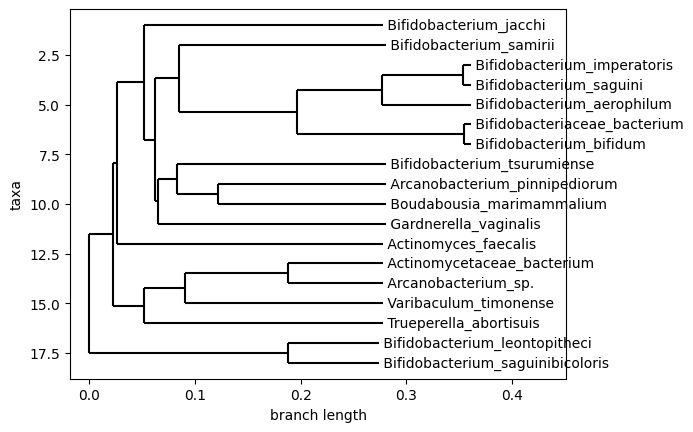

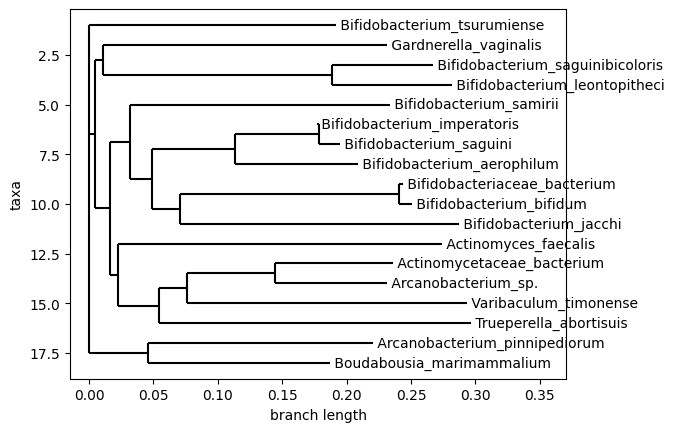

In [6]:
upgmatree_GH95 = Phylo.read("upgma_gh95.nwk", "newick")
njtree_GH95 = Phylo.read("nj.nwk_gh95", "newick")

for clade in upgmatree_GH95.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

for clade in njtree_GH95.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

Phylo.draw(upgmatree_GH95)
Phylo.draw(njtree_GH95)